In [1]:
from collections import Counter
from transformers import GPT2Tokenizer, GPT2Model, pipeline, AutoTokenizer, AutoModel
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.utils.data
import math
import torch.nn.functional as F
import neptune
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [3]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dev

device(type='cuda')

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('indonesian-nlp/gpt2-medium-indonesian')
model = GPT2Model.from_pretrained('indonesian-nlp/gpt2-medium-indonesian')
text = "Ubah dengan teks apa saja."
encoded_input = tokenizer(text)

In [ ]:
encoded_input

{'input_ids': [57, 3885, 327, 3940, 672, 567, 18], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [37]:
token_to_id = {}
all_vocab = tokenizer.get_vocab()
for i, token in enumerate(all_vocab):
    token_to_id[token] = i

In [51]:
token_to_id['bagaimana']

21460

In [35]:
id_to_token = tokenizer.convert_ids_to_tokens(12572)
id_to_token

'makan'

In [32]:
model.get_input_embeddings()(torch.tensor(12572))

tensor([ 0.0328,  0.0370,  0.0900,  ..., -0.0119,  0.1038,  0.0577],
       grad_fn=<EmbeddingBackward0>)

In [12]:
tokenizer.get_vocab()['makan']

12572

In [7]:
token_embedding = {token: model.get_input_embeddings()(torch.tensor(id))  for token, id in }

IndexError: index out of range in self

In [52]:
model.get_input_embeddings()

Embedding(50257, 1024)

In [51]:
print(model.get_input_embeddings()(torch.tensor(tokenizer.get_vocab()['apa'])))

tensor([ 0.2161, -0.0400,  0.3545,  ...,  0.1621, -0.0193,  0.1069],
       grad_fn=<EmbeddingBackward0>)


In [24]:
len(features[0][0])

1024

In [44]:
tokenizer.get_vocab()['pak']

22453

In [5]:
tokenizer_bert = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model_bert = AutoModel.from_pretrained("indolem/indobert-base-uncased")

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
model_bert = model_bert.to(dev)

In [7]:
test_kalimat = [
    "apa visi filkom",
    "apa saja visi filkom",
    "sebutkan visi filkom",
    "saya ingin tahu visi filkom",
    "apa misi filkom",
    "bagaimana visi dari filkom"
    "apa visi dari filkom",
    "apa misi dari filkom",
    "bagaimana cara mencapai visi filkom",
    "siapa dekan filkom",
    "dekan filkom",
    "pimpinan filkom",
    "wakil dekan filkom"
    "siapa kepala lab filkom",
    "siapa rektor ub",
    "apa tujuan filkom",
]
encoded_input = tokenizer_bert(test_kalimat, return_tensors='pt', padding=True, truncation=True)
encoded_input = encoded_input.to(dev)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [104]:
test_output = model_bert(**encoded_input)
last_state = test_output.last_hidden_state.detach().cpu().numpy()
last_state = last_state.mean(axis=1)
# last_state = last_state.reshape(last_state.shape[0], -1)
last_state.shape

(14, 768)

In [105]:
pca = PCA(n_components=2)
reduced_last = pca.fit_transform(last_state)
reduced_last.shape

(14, 2)

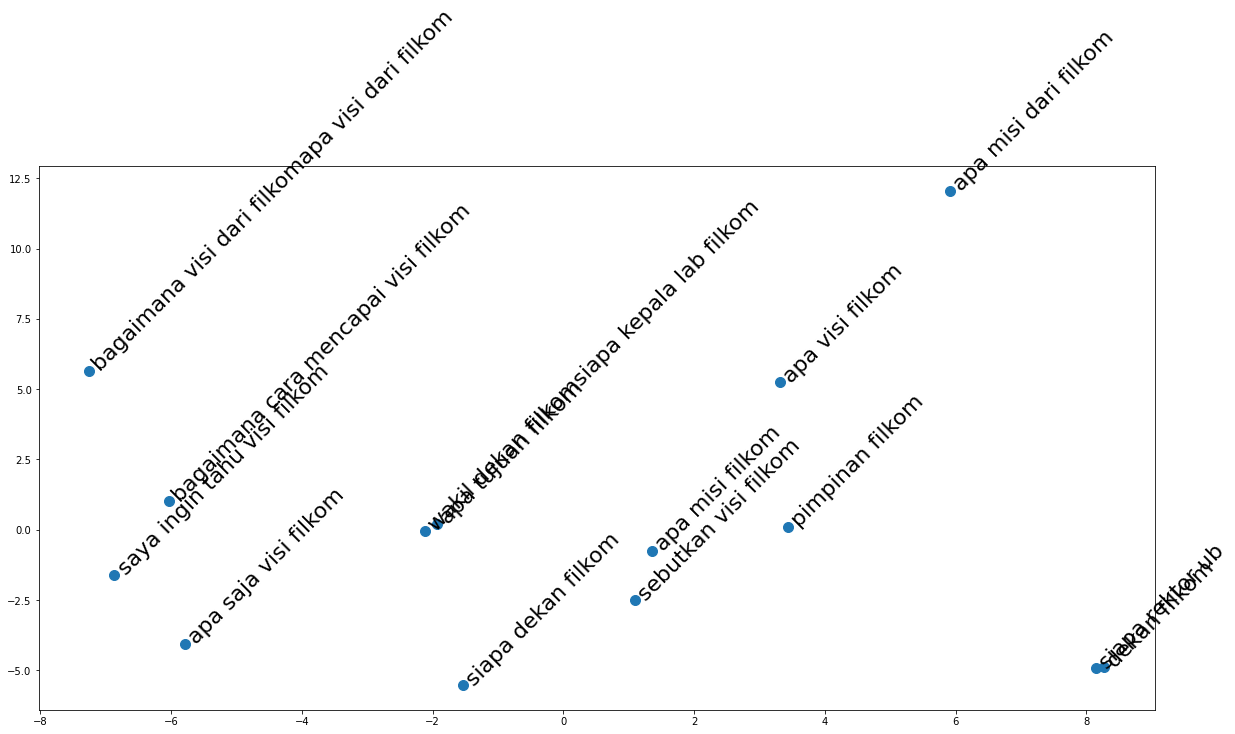

In [106]:
plt.figure(figsize=(20, 10))
plt.scatter(reduced_last[:, 0], reduced_last[:, 1], s=100)
for i, txt in enumerate(test_kalimat):
    plt.annotate(txt, (reduced_last[i, 0], reduced_last[i, 1]), fontsize=22, rotation=45)
plt.show()

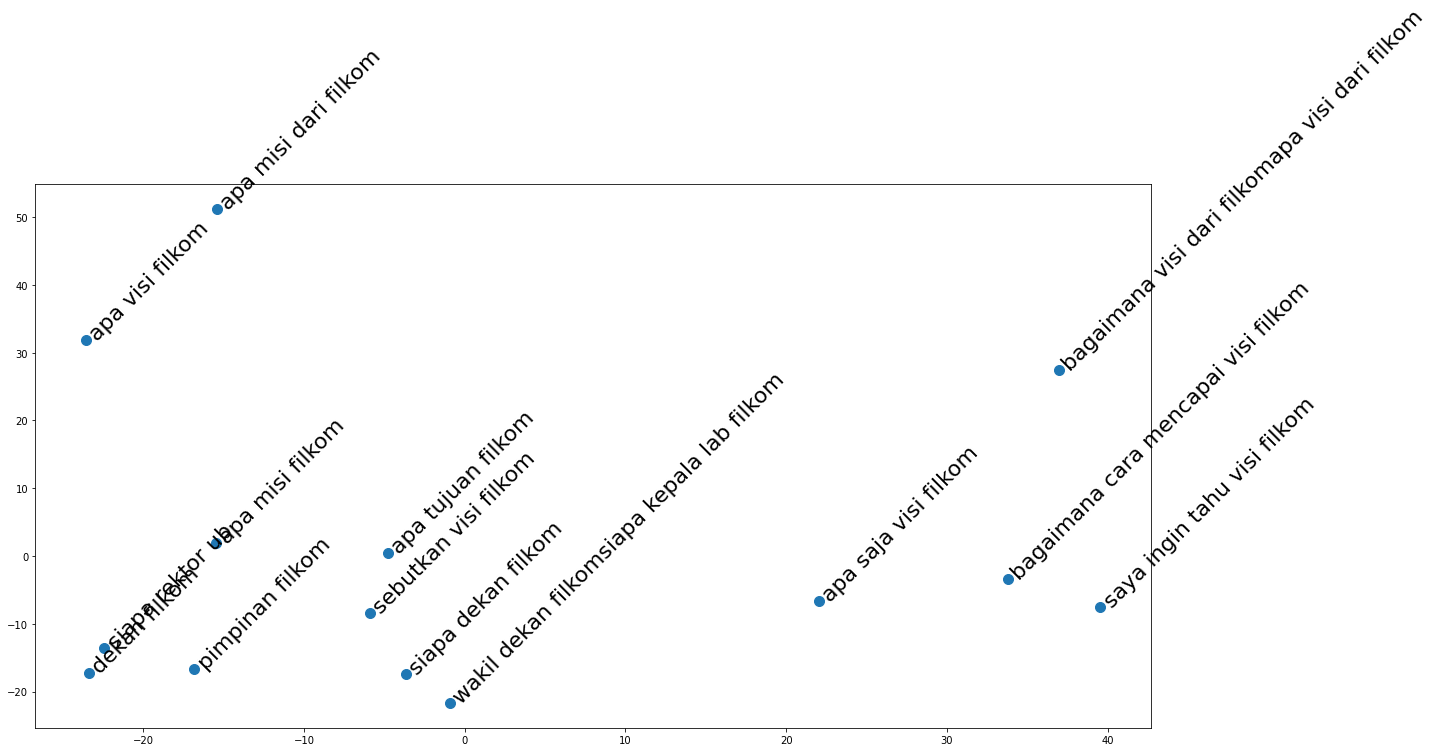

In [100]:
plt.figure(figsize=(20, 10))
plt.scatter(reduced_last[:, 0], reduced_last[:, 1], s=100)
for i, txt in enumerate(test_kalimat):
    plt.annotate(txt, (reduced_last[i, 0], reduced_last[i, 1]), fontsize=22, rotation=45)
plt.show()